In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
img = cv2.imread('images/saturn.png', cv2.IMREAD_GRAYSCALE)

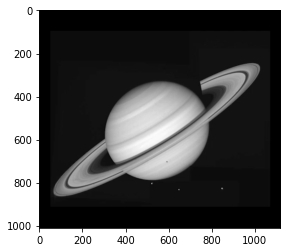

In [24]:
plt.imshow(img, cmap='binary_r')

## Add Noise to the Image

In [36]:
M = 128
sigma = 32
noise = M + (sigma * np.random.randn(*img.shape)).round()

In [37]:
noise

array([[108., 165., 139., ..., 186., 136.,  79.],
       [138.,  88., 171., ..., 173.,  78., 142.],
       [165., 131., 111., ..., 168., 140., 168.],
       ...,
       [101.,  73., 192., ..., 120., 134., 109.],
       [138., 173., 127., ..., 142., 163., 138.],
       [120., 154., 127., ..., 136.,  92., 118.]])

In [38]:
noisy_img = cv2.add(img/2, noise/2)

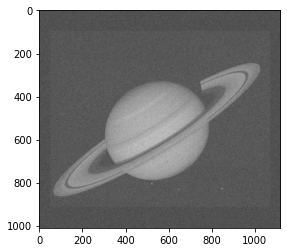

In [39]:
plt.imshow(noisy_img, cmap='binary_r')

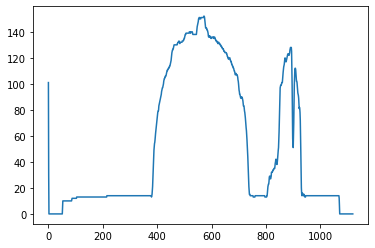

In [43]:
plt.plot(img[400])

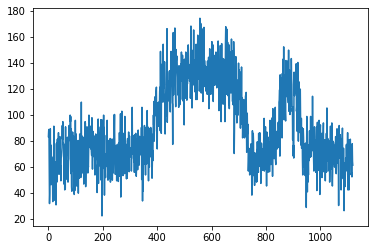

In [42]:
plt.plot(noisy_img[400])

## Gaussian Filter

In [97]:
size = 9
sigma = 3

kernel = cv2.getGaussianKernel(size, sigma)
kernel

array([[0.0629702 ],
       [0.0929025 ],
       [0.12264921],
       [0.14489292],
       [0.15317033],
       [0.14489292],
       [0.12264921],
       [0.0929025 ],
       [0.0629702 ]])

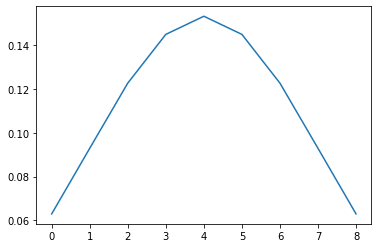

In [98]:
plt.plot(kernel)

In [99]:
kernel_2 = kernel * kernel.T

In [100]:
kernel_2

array([[0.00396525, 0.00585009, 0.00772325, 0.00912394, 0.00964517,
        0.00912394, 0.00772325, 0.00585009, 0.00396525],
       [0.00585009, 0.00863087, 0.01139442, 0.01346091, 0.01422991,
        0.01346091, 0.01139442, 0.00863087, 0.00585009],
       [0.00772325, 0.01139442, 0.01504283, 0.017771  , 0.01878622,
        0.017771  , 0.01504283, 0.01139442, 0.00772325],
       [0.00912394, 0.01346091, 0.017771  , 0.02099396, 0.0221933 ,
        0.02099396, 0.017771  , 0.01346091, 0.00912394],
       [0.00964517, 0.01422991, 0.01878622, 0.0221933 , 0.02346115,
        0.0221933 , 0.01878622, 0.01422991, 0.00964517],
       [0.00912394, 0.01346091, 0.017771  , 0.02099396, 0.0221933 ,
        0.02099396, 0.017771  , 0.01346091, 0.00912394],
       [0.00772325, 0.01139442, 0.01504283, 0.017771  , 0.01878622,
        0.017771  , 0.01504283, 0.01139442, 0.00772325],
       [0.00585009, 0.00863087, 0.01139442, 0.01346091, 0.01422991,
        0.01346091, 0.01139442, 0.00863087, 0.00585009],


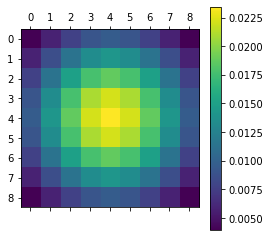

In [101]:
plt.matshow(kernel_2)
plt.colorbar()

In [102]:
filtered_img = np.zeros(noisy_img.shape)
filtered_img = cv2.filter2D(noisy_img, -1, kernel_2)

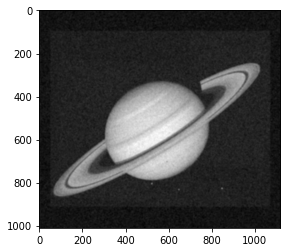

In [103]:
plt.imshow(filtered_img, cmap='binary_r')

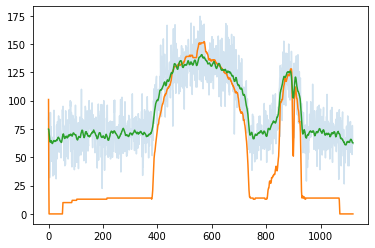

In [107]:
plt.plot(noisy_img[400], alpha=0.2)
plt.plot(img[400])
plt.plot(filtered_img[400])